<a href="https://colab.research.google.com/github/lexxai/goit_python_ds_hw_06/blob/main/goit_python_ds_hw_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATASET LOAD

In [14]:
from pathlib import Path

SAVED_DATAFRAME_BASE = Path("/content/")
URL="https://drive.usercontent.google.com/download?id=1Zvz20Iqeia1eEtFbGa3NcIrt_SNSimP6&export=download&authuser=0"
OUTPUT = Path("/content/data.zip")
CSV_DATA_PATH  = Path("/content/data")
SEED = 42

In [17]:
if not OUTPUT.is_file():
  !wget -q -O $OUTPUT $URL

if OUTPUT.is_file() and not CSV_DATA_PATH.is_dir():
  !unzip -q -o $OUTPUT
  #!rm $OUTPUT

## data_2d

In [38]:
import pandas as pd

df_2d = pd.read_csv(CSV_DATA_PATH.joinpath("data_2d.csv"), header=None ,names=["X","Y","Z"])
df_2d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       200 non-null    float64
 1   Y       200 non-null    float64
 2   Z       200 non-null    float64
dtypes: float64(3)
memory usage: 4.8 KB


In [178]:
# df_2d.describe()

## mnist

In [212]:
df_mnist_raw = pd.read_csv(CSV_DATA_PATH.joinpath("mnist.csv"), header=None)
df_mnist_y = df_mnist_raw.iloc[:,0]
df_mnist = df_mnist_raw.iloc[:,1:]
df_mnist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 784 entries, 1 to 784
dtypes: int64(784)
memory usage: 3.0 MB


28.0

In [180]:
df_mnist_y.value_counts().sort_index()

0    42
1    67
2    55
3    45
4    55
5    50
6    43
7    49
8    40
9    54
Name: 0, dtype: int64

In [181]:
df_mnist_y.head()

0    7
1    2
2    1
3    0
4    4
Name: 0, dtype: int64

# TASK 1

## K-means для кластеризації

### Пошук Сумм квадратів відстаней від точок до їх найближчого центру кластера.

In [293]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

import numpy as np

method = lambda cl: KMeans(n_clusters=cl, random_state=SEED, n_init="auto")

def get_kmeans_list(df, k_list):
  sc = StandardScaler(with_std=True)
  X = sc.fit_transform(df)
  # X = df
  kmeans_list = []
  for cl in k_list:
    kmeans = method(cl).fit(X)
    kmeans_list.append(kmeans)
    # print(f"{kmeans.inertia_=}")
  return kmeans_list

In [241]:
def get_optimal_k(df, k_list):
  silhouette_scores = []
  sc = StandardScaler(with_std=True)
  X = sc.fit_transform(df)
  for k in k_list:
      kmeans = method(k)
      labels = kmeans.fit_predict(X)
      silhouette_scores.append(silhouette_score(X, labels))
  optimal_k = k_list[np.argmax(silhouette_scores)]
  return optimal_k

In [70]:
import matplotlib.pyplot as plt

def plot_kmeans(k_list, means_list):
  inertias = [ kmeans.inertia_ for kmeans in kmeans_list ]
  plt.plot(k_list, inertias, marker='o')
  plt.xlabel('Кількість кластерів (k)')
  plt.ylabel('Сума квадратів відстаней до центру кластера')
  plt.title('Метод ліктя для пошуку оптимального k')
  plt.xticks(k_list)
  plt.grid(True)
  plt.show()

In [124]:
def plot_diff_kmeans(k_list, means_list):
  inertias = [ kmeans.inertia_ for kmeans in kmeans_list ]
  # print(np.diff(inertias))
  # print(np.diff(k_list))
  dy_dx = np.diff(inertias) / np.diff(k_list)
  plt.plot(k_list[:-1], dy_dx, marker='x')
  plt.xlabel('Кількість кластерів (k)')
  plt.ylabel('Зміна сумм квадратів відстаней до центру кластера')
  plt.title('Метод ліктя для пошуку оптимального k. Швидкість змін.')
  plt.xticks(k_list)
  plt.grid(True)
  plt.show()

In [284]:
def plot_mnist_picture(df, id):
  data = df.iloc[id,:]
  p_size = int(data.shape[0]**(0.5))
  data = data.values.reshape(p_size, p_size)
  plt.imshow(data, cmap='gray_r')
  plt.axis('off')
  plt.show()


### dataset df_2d

#### Пошук k, dataset df_2d

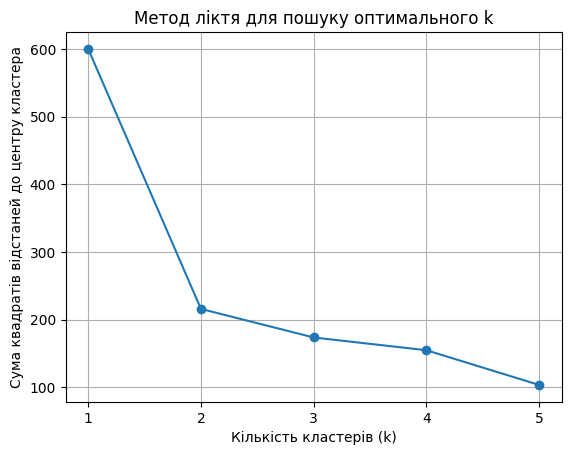

In [286]:
k_list = list(range(1,6))
kmeans_list = get_kmeans_list(df_2d, k_list)
plot_kmeans(k_list, kmeans_list)

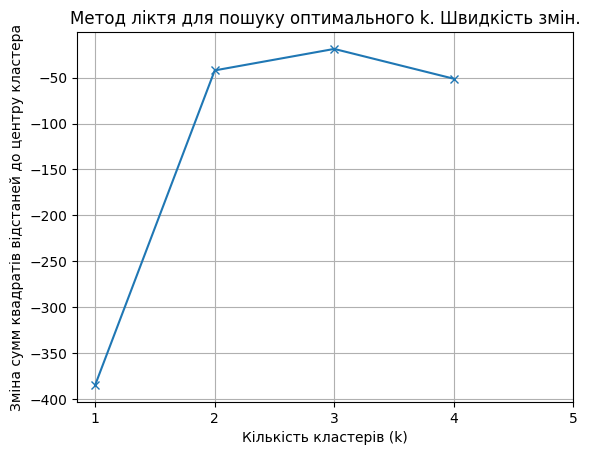

In [287]:
plot_diff_kmeans(k_list, kmeans_list)

#### Результат для k=2, dataset df_2d

In [288]:
k = 2
k_id = k_list.index(k)
kmeans_2d = kmeans_list[k_id]

In [289]:
print(f"{kmeans_2d.labels_}")

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


#### Distance

In [296]:
print("Cluster centers")
print(f"{kmeans_2d.cluster_centers_}")

Cluster centers
[[ 1.          0.56518053  0.82493211]
 [-0.96078431 -0.54301659 -0.79258183]]


In [298]:
distances = euclidean_distances(kmeans_2d.cluster_centers_)
print("Дистанція між центрами кластерів")
print(distances)

Дистанція між центрами кластерів
[[0.         2.77292757]
 [2.77292757 0.        ]]


### dataset df_mnist

#### Пошук k, dataset df_mnist

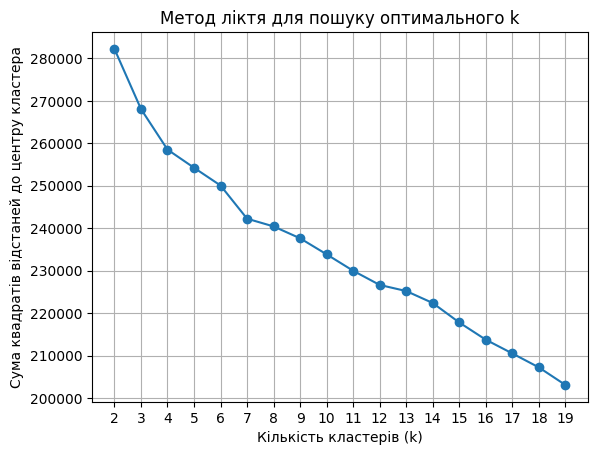

In [272]:
k_list = list(range(2,20))
kmeans_list = get_kmeans_list(df_mnist, k_list)
plot_kmeans(k_list, kmeans_list)

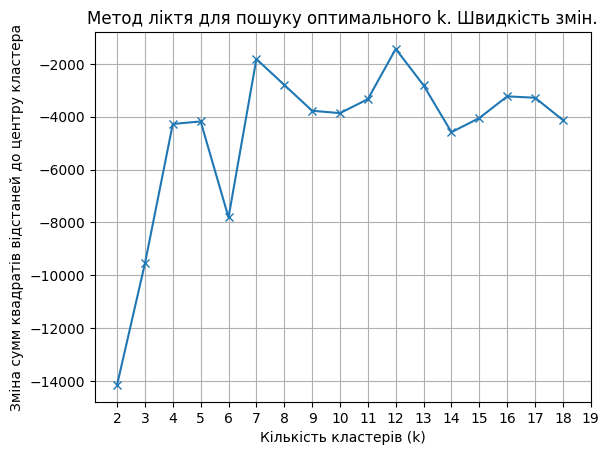

In [273]:
plot_diff_kmeans(k_list, kmeans_list)

#### Результат для k=5, dataset df_mnist

In [275]:
k = 4
k_id = k_list.index(k)
kmeans_minst = kmeans_list[k_id]

In [276]:
print(f"{kmeans_minst.labels_}")
#print(f"{kmeans_minst.cluster_centers_=}")

[1 3 2 3 1 2 1 2 0 1 3 3 1 3 2 3 1 1 3 1 1 2 2 0 1 3 1 1 3 2 2 2 2 3 1 3 1
 2 2 2 2 1 1 2 2 2 2 2 1 1 2 3 0 2 3 2 1 2 1 2 1 3 1 2 1 2 3 1 2 3 1 3 3 2
 2 1 2 2 2 1 1 2 3 1 1 1 1 2 3 2 2 2 2 2 2 1 2 2 2 1 2 3 0 1 1 1 3 2 1 1 2
 2 2 1 2 2 1 1 1 1 1 2 1 2 1 1 3 0 1 0 2 3 3 1 2 2 3 2 3 1 2 1 2 2 1 2 1 3
 3 2 1 1 0 2 2 0 2 3 3 2 1 3 0 1 2 3 1 2 2 1 1 1 3 2 2 2 2 2 2 2 2 2 2 3 2
 1 3 3 3 2 2 2 0 1 3 2 2 2 1 3 3 3 2 2 2 2 1 3 3 1 1 2 1 2 1 3 2 0 2 0 1 3
 3 1 2 3 1 2 2 2 2 2 2 1 2 1 2 2 1 2 2 1 3 1 2 2 3 2 1 2 1 2 1 2 1 1 2 2 3
 3 0 2 1 1 2 2 3 2 3 3 2 3 2 1 1 1 2 1 3 2 2 1 2 0 1 2 2 3 2 2 1 3 1 2 3 1
 3 3 3 2 2 1 2 2 2 3 2 2 1 2 2 3 3 3 2 1 0 2 3 3 2 2 1 2 2 2 2 3 2 2 2 2 2
 0 2 2 1 1 3 2 2 2 2 3 2 2 2 0 2 1 2 1 3 3 2 2 0 2 1 1 3 3 1 2 1 2 2 3 2 2
 1 2 3 1 1 0 1 2 2 1 3 1 2 1 3 2 2 2 2 1 3 1 2 2 1 2 3 2 1 1 3 2 3 1 2 3 3
 3 3 2 1 2 1 1 1 1 2 1 3 2 2 0 1 2 3 1 2 2 1 1 2 2 2 1 1 2 2 3 1 2 3 3 2 2
 0 3 3 1 2 3 2 1 2 3 1 2 2 2 1 3 1 3 3 3 1 1 2 2 1 1 2 1 3 2 1 3 2 3 2 1 2
 1 1 2 1 3 1 1 1 2 3 2 0 

#### Distance

In [302]:
print("Cluster centers")
print(f"{kmeans_minst.cluster_centers_}")
print(f"{kmeans_minst.cluster_centers_.shape=}")

Cluster centers
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
kmeans_minst.cluster_centers_.shape=(4, 784)


In [301]:
distances = euclidean_distances(kmeans_minst.cluster_centers_)
print("Дистанція між центрами кластерів")
print(distances)

Дистанція між центрами кластерів
[[ 0.         17.29738192 16.41362044 18.81488791]
 [17.29738192  0.         10.31327845 14.4492117 ]
 [16.41362044 10.31327845  0.         13.68250506]
 [18.81488791 14.4492117  13.68250506  0.        ]]


#### Зображення символу

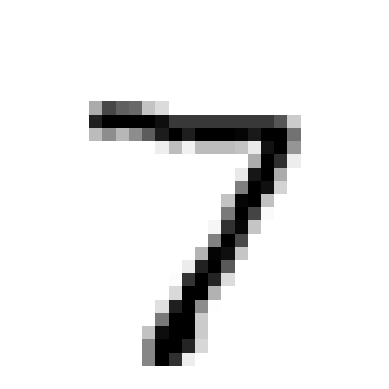

In [303]:
plot_mnist_picture(df_mnist,0)

#### Count class values

In [256]:
unique, counts = np.unique(kmeans_minst.labels_, return_counts=True)
for u,c in zip(unique, counts):
  print(u,c)

0 22
1 152
2 218
3 108


In [304]:
np.diff(kmeans_minst.cluster_centers_)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])